In [62]:
#!pip install numpy
#!pip install scipy
#!pip install torch
#!pip install torch_geometric
#!pip install matplotlib
#!pip install scikit-learn
#!pip install pandas
#!pip install git+https://github.com/alitwinkumar/connectome_tools.git
#!pip install torch_scatter
#!pip install torch_sparse

In [177]:
# Install required packages.
import os
import torch
import numpy as np
import pandas as pd
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
    

2.6.0


In [178]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [186]:
from connectome_tools import load_flywire
# Use connectome_loaders to import FlyWire neurons 
neurons, _ = load_flywire('FlyWire_data/') # datapath to FlyWire 
neurons

,root_id,group,nt_type,nt_type_score,da_avg,ser_avg,gaba_avg,glut_avg,ach_avg,oct_avg,...,class,sub_class,cell_type,hemibrain_type,hemilineage,side,nerve,J_idx,J_idx_post,J_idx_pre
0,720575940596125868,LO.LOP,ACH,0.57,0.03,0.00,0.05,0.28,0.57,0.07,...,NaN,NaN,T5c,NaN,NaN,right,NaN,0,0,0
1,720575940597856265,ME,ACH,0.85,0.01,0.00,0.03,0.04,0.85,0.07,...,NaN,NaN,Tm16,NaN,NaN,right,NaN,1,1,1
2,720575940597944841,ME.LO,ACH,0.82,0.02,0.00,0.01,0.05,0.82,0.09,...,NaN,NaN,CB3851,NaN,NaN,right,NaN,2,2,2
3,720575940598267657,ME,GABA,0.74,0.01,0.01,0.74,0.19,0.03,0.02,...,NaN,NaN,TmY15,NaN,NaN,right,NaN,3,3,3
4,720575940599333574,ME,ACH,0.61,0.02,0.00,0.13,0.13,0.61,0.11,...,NaN,NaN,Tm1,NaN,NaN,right,NaN,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139250,720575940661335681,GNG,GABA,0.71,0.00,0.00,0.71,0.17,0.11,0.00,...,NaN,NaN,CB0180,NaN,MX12__prim,left,NaN,139250,139250,139250
139251,720575940661336193,ME.LO,ACH,0.62,0.02,0.00,0.18,0.16,0.62,0.03,...,NaN,NaN,TmY3,NaN,NaN,left,NaN,139251,139251,139251
139252,720575940661337217,SCL.MB_ML,ACH,1.00,0.00,0.00,0.00,0.00,1.00,0.00,...,Kenyon_Cell,NaN,NaN,KCab-p,MBp4,left,NaN,139252,139252,139252
139253,720575940661338497,GNG,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,CB0904,NaN,putative_primary,right,PhN,139253,139253,139253


In [187]:
# Import FlyWire connections as an edgelist
connections = pd.read_csv('FlyWire_data/connections.csv')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,720575940605876866,720575940606514878,LAL_R,15,GABA
2,720575940627737365,720575940628914436,AL_L,32,ACH
3,720575940633587552,720575940626452879,SMP_R,15,ACH
4,720575940616871878,720575940621203973,AVLP_L,13,GABA
...,...,...,...,...,...
3869873,720575940621773517,720575940611139733,PVLP_R,1,ACH
3869874,720575940622734576,720575940609171395,ICL_L,2,ACH
3869875,720575940638466367,720575940627036426,LO_L,5,ACH
3869876,720575940629789660,720575940631553603,GOR_R,3,ACH


In [188]:
# Restrict dataset to a specific neuropil 
neuropil_of_interest = 'LH_L'
connections = connections[connections['neuropil'] == neuropil_of_interest] # Filter connections in edgelist by neuropil of interest

lh_neurons = list(np.unique(list(connections['pre_root_id']) + list(connections['post_root_id']))) # Subselect neurons in neuropil of interest
neurons = neurons[neurons['root_id'].isin(lh_neurons)]
#neurons = neurons[neurons['nt_type'].map(neurons['nt_type'].value_counts()) > 100]

print('Number of neurons in ' + neuropil_of_interest + ': ' + str(len(neurons)))

Number of neurons in LH_L: 4067


In [189]:
connections['nt_type'].value_counts()

nt_type
ACH     23466
GABA     9638
GLUT     7529
DA        273
SER       138
OCT        88
Name: count, dtype: int64

In [190]:
neurons['nt_type'].value_counts()

nt_type
ACH     2310
GLUT    1093
GABA     452
DA        29
SER       21
OCT        8
Name: count, dtype: int64

In [191]:
#connections = connections[connections['nt_type'].map(connections['nt_type'].value_counts()) > 500]

In [192]:
all_neurons = list(neurons['root_id']) # List of neurons in graph
#all_neuron_types = list(neurons['cell_type']) # List of types for each neuron in graph
all_neuron_types = list(neurons['class']) # List of types for each neuron in graph


In [193]:
# %%
all_unique_types = np.array((neurons['cell_type'].unique())) # List of unique neuron types in graph
#all_unique_types = np.array((neurons['class'].unique())) # List of unique neuron types in graph


In [194]:
# import torch
# from torch_geometric.datasets import Planetoid
# from torch_geometric.transforms import GDC
# from torch_geometric.utils import to_dense_adj
# from torch_sparse import spmm

# # Load dataset (e.g. Cora)
# dataset = Planetoid(root='/tmp/Cora', name='Cora')
# data = dataset[0]

# # Make sure edge_attr is either None or 1D
# data.edge_attr = None

# # Set up GDC with PPR
# gdc = GDC(
#     self_loop_weight=1,
#     normalization_in='sym',
#     normalization_out='col',
#     diffusion_kwargs=dict(method='ppr', alpha=0.15, eps=1e-4),
#     sparsification_kwargs=dict(method='threshold', eps=1e-4),
#     exact=True
# )

# # Apply the transformation
# data_diffused = gdc(data)

# # Get diffused adjacency
# edge_index = data_diffused.edge_index
# edge_weight = data_diffused.edge_attr  # weights after diffusion

# # Multiply diffused adjacency by node features using sparse matmul
# x = data.x
# out = spmm(edge_index, edge_weight, x.size(0), x.size(0), x)

# print("Original feature shape:", x.shape)
# print("Diffused feature shape:", out.shape)


In [195]:
x[:,0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [196]:
out[:,0]

tensor([3.4020, 3.4006, 3.3995,  ..., 3.1137, 3.1137, 3.1137],
       grad_fn=<SelectBackward0>)

In [197]:
all_unique_types

array(['CB2965', 'CB2377', nan, ..., 'CB2087', 'CB3506', 'CL283c'],
      shape=(1268,), dtype=object)

In [198]:

# Node attributes: The cell type of each neuron (this will be represented as a one-hot encoding)
# (num_nodes, num_feats)
node_types = np.zeros((len(all_neurons), len(all_unique_types)))
for i_neuron, neuron in enumerate(all_neurons):
    i_type = np.where(all_unique_types == all_neuron_types[i_neuron])
    assert len(i_type) == 1
    node_types[i_neuron, i_type] = 1
    


In [199]:
# Edge attributes: The strength of connectivity (synaptic count) of each connection
connections = connections.astype({"syn_count": 'float32'})

In [200]:
import networkx as nx

In [201]:
# networkx graph -> PyTorch geometric object transformation is easy
G = nx.DiGraph() # Initialize a networkx directed graph 
G = nx.from_pandas_edgelist(connections, 'pre_root_id', 'post_root_id', ['syn_count'], create_using=nx.DiGraph()) # Create a graph with our node and edge information

In [202]:
# Get unique values from 'Column1'
unique_labels = neurons['nt_type'].unique()

print(unique_labels)

[nan 'ACH' 'GLUT' 'GABA' 'DA' 'SER' 'OCT']


In [203]:
import pandas as pd


In [204]:
neurons.loc[:, 'nt_type'] = neurons['nt_type'].fillna('missing')

In [205]:
neurons.loc[:, 'class'] = neurons['class'].fillna('missing')

In [206]:
neurons.loc[:, 'class']

86        missing
104       missing
126       missing
127       missing
140          ALPN
           ...   
138936    missing
138973    missing
138984    missing
139159    missing
139169       ALPN
Name: class, Length: 4067, dtype: object

In [207]:
neurons['nt_type']

86        missing
104           ACH
126          GLUT
127          GLUT
140           ACH
           ...   
138936        ACH
138973       GABA
138984        ACH
139159        ACH
139169        ACH
Name: nt_type, Length: 4067, dtype: object

In [208]:
cat = pd.Categorical(neurons['nt_type'])

print(cat)
print(cat.codes)     # Numeric codes
print(cat.categories)  # Category labels

['missing', 'ACH', 'GLUT', 'GLUT', 'ACH', ..., 'ACH', 'GABA', 'ACH', 'ACH', 'ACH']
Length: 4067
Categories (7, object): ['ACH', 'DA', 'GABA', 'GLUT', 'OCT', 'SER', 'missing']
[6 0 3 ... 0 0 0]
Index(['ACH', 'DA', 'GABA', 'GLUT', 'OCT', 'SER', 'missing'], dtype='object')


In [209]:
pd.Categorical(neurons['class']).codes

array([12, 12, 12, ..., 12, 12,  1], shape=(4067,), dtype=int8)

In [210]:
from torch_geometric.utils.convert import from_networkx

In [211]:
#neurons

In [212]:
import numpy as np

In [213]:
# Convert graph into PyTorch geometric object
graph = from_networkx(G, group_edge_attrs=['syn_count']) # Add edge attributes from networkx graph

#feat1 = torch.from_numpy(cell_stats['length_nm'].to_numpy()).float().unsqueeze(1)
#feat2 = torch.from_numpy(cell_stats['area_nm'].to_numpy()).float().unsqueeze(1)
feat3 = torch.from_numpy(np.copy(pd.Categorical(neurons['class']).codes)).long().unsqueeze(1)
#feat4 = torch.from_numpy(np.copy(pd.Categorical(neurons['nt_type']).codes)).float().unsqueeze(1)

#graph.x = torch.cat([feat1, feat2, feat3, feat4], dim=1)
#graph.x = torch.cat([feat1, feat2], dim=1)
graph.x = torch.cat([feat3], dim=1)
#graph.x = torch.from_numpy(cell_stats['length_nm'].to_numpy()).float().unsqueeze(1)
#graph.x = torch.from_numpy(node_types).float() # Add node attributes (one-hot encoded cell type)


In [218]:
neurons['class'].value_counts()

class
missing        3352
ALPN            326
LHLN            255
AN               37
mAL              29
LHCENT           21
MBON             17
CX               10
Kenyon_Cell       8
ALIN              5
DAN               5
bilateral         1
MBIN              1
Name: count, dtype: int64

In [214]:
graph

Data(edge_index=[2, 41132], edge_attr=[41132, 1], num_nodes=4067, x=[4067, 1])

In [110]:
feat3.shape

torch.Size([4067, 1])

In [111]:
from torch_geometric.transforms import GDC

gdc = GDC(
    self_loop_weight=1,
    normalization_in='sym',
    normalization_out='col',
    diffusion_kwargs=dict(method='ppr', alpha=0.15, eps=1e-4),
    sparsification_kwargs=dict(method='threshold', eps=1e-4),
    exact=True
)
from torch_sparse import spmm

In [112]:
print(graph.edge_attr.shape)

torch.Size([40633, 1])


In [113]:

graph.edge_attr = graph.edge_attr.view(-1)
data_diffused = gdc(graph)

# 1) Apply GDC to get a diffused adjacency:
data_diffused = gdc(graph)  # This modifies edge_index, edge_attr in a new Data object.

# data_diffused.edge_index is the "diffused" adjacency structure
# data_diffused.edge_attr (if not None) are the corresponding weights

# 2) Multiply the new adjacency by your features:
edge_index = data_diffused.edge_index
edge_weight = data_diffused.edge_attr  # or None if unweighted
X = graph.x

# spmm performs sparse matrix multiplication:  X_new = A * X
# where A is encoded by (edge_index, edge_weight)
X_diffused = spmm(edge_index, edge_weight, X.size(0), X.size(0), X)

# Now X_diffused has the "diffused" features for each node
graph.x = X_diffused  # Overwrite original features if desired

In [115]:
graph.y = torch.from_numpy(np.copy(pd.Categorical(neurons['nt_type']).codes)).long()

In [116]:
graph.x.shape

torch.Size([4067, 1])

In [117]:
num_features = graph.x.shape[1]
num_classes = len(np.unique(graph.y))
num_nodes = graph.x.shape[0]

In [118]:
num_features

1

In [119]:
num_nodes

4067

In [120]:
num_classes

7

In [121]:
torch.sum(graph.y == 0)

tensor(2310)

In [134]:
import torch
from torch_geometric.data import Data

def filter_rare_classes_and_update_edges(data, min_count):
    y = data.y
    counts = torch.bincount(y)
    keep_classes = (counts >= min_count).nonzero(as_tuple=True)[0]

    # Mask of nodes to keep
    keep_mask = torch.isin(y, keep_classes)
    new_node_count = keep_mask.sum().item()

    # Map old indices to new compacted indices
    old_to_new = torch.full((y.size(0),), -1, dtype=torch.long)
    old_to_new[keep_mask] = torch.arange(new_node_count)

    # Filter node-level attributes
    for key in data.keys():
        attr = data[key]
        if isinstance(attr, torch.Tensor) and attr.size(0) == y.size(0):
            data[key] = attr[keep_mask]

    # Filter and remap edge_index
    src, dst = data.edge_index
    edge_mask = keep_mask[src] & keep_mask[dst]
    edge_index = data.edge_index[:, edge_mask]
    edge_index = old_to_new[edge_index]  # remap to new indices
    data.edge_index = edge_index

    # Update num_nodes to reflect the new graph
    data.num_nodes = new_node_count

    return data


In [142]:
# Drop nodes from rare classes (< 50 examples) and fix edge_index
graph = filter_rare_classes_and_update_edges(graph, min_count=200)

print("New number of nodes:", graph.num_nodes)
print("Remaining class labels:", torch.unique(graph.y))
print("Class counts:", torch.bincount(graph.y))
print("Edge index shape:", graph.edge_index.shape)

New number of nodes: 3855
Remaining class labels: tensor([0, 2, 3])
Class counts: tensor([2310,    0,  452, 1093])
Edge index shape: torch.Size([2, 35516])


In [143]:
import torch
from torch_geometric.utils import index_to_mask

def create_balanced_split(data, num_train_per_class, num_val_per_class=0, num_test_per_class=50):
    y = data.y
    num_nodes = data.num_nodes
    unique_classes = torch.unique(y)

    train_idx = []
    val_idx = []
    test_idx = []

    for c in unique_classes:
        class_nodes = (y == c).nonzero(as_tuple=True)[0]
        class_nodes = class_nodes[torch.randperm(class_nodes.size(0))]

        total_needed = num_train_per_class + num_val_per_class + num_test_per_class
        if len(class_nodes) < total_needed:
            raise ValueError(f"Not enough samples for class {c.item()}. Needed {total_needed}, got {len(class_nodes)}.")

        train = class_nodes[:num_train_per_class]
        val = class_nodes[num_train_per_class:num_train_per_class + num_val_per_class]
        test = class_nodes[num_train_per_class + num_val_per_class:total_needed]

        train_idx.append(train)
        val_idx.append(val)
        test_idx.append(test)

    train_mask = index_to_mask(torch.cat(train_idx), size=num_nodes)
    val_mask = index_to_mask(torch.cat(val_idx), size=num_nodes) if num_val_per_class > 0 else None
    test_mask = index_to_mask(torch.cat(test_idx), size=num_nodes)

    data.train_mask = train_mask
    if val_mask is not None:
        data.val_mask = val_mask
    data.test_mask = test_mask

    return data


In [144]:
print(graph.y.bincount())

tensor([2310,    0,  452, 1093])


In [145]:
graph

Data(edge_index=[2, 35516], edge_attr=[40633], num_nodes=3855, x=[3855, 1], y=[3855], train_mask=[3855], val_mask=[3855], test_mask=[3855])

In [146]:
# Make a balanced split with 20 train, 10 val, 50 test nodes per class
graph = create_balanced_split(graph, num_train_per_class=100, num_val_per_class=100, num_test_per_class=100)

# Quick check
print("Train class counts:", graph.y[graph.train_mask].bincount())
print("Val class counts:", graph.y[graph.val_mask].bincount())
print("Test class counts:", graph.y[graph.test_mask].bincount())


Train class counts: tensor([100,   0, 100, 100])
Val class counts: tensor([100,   0, 100, 100])
Test class counts: tensor([100,   0, 100, 100])


In [ ]:
#train_ratio = 0.7  # 70% of nodes for training

# Create train and test masks
#num_train = int(train_ratio * num_nodes)
#train_mask = torch.zeros(num_nodes, dtype=torch.bool)
#test_mask = torch.zeros(num_nodes, dtype=torch.bool)

# Assign random train and test nodes
#perm = torch.randperm(num_nodes)
#train_mask[perm[:num_train]] = True
#test_mask[perm[num_train:]] = True

# Create PyG Data object
#data = Data(x=hidden_states, edge_index=edge_index, y=y2, train_mask=train_mask, test_mask=test_mask, edge_attr=edge_attr)
#data = Data(x=hidden_states.detach(), edge_index=edge_index, y=y2, train_mask=train_mask, test_mask=test_mask)


In [148]:
#graph.train_mask = train_mask # Add node attributes (one-hot encoded cell type)
#graph.test_mask = test_mask # Add node attributes (one-hot encoded cell type)


In [149]:
from torch_geometric.transforms import NormalizeFeatures

transform = NormalizeFeatures()
graph = transform(graph)

In [150]:
# Show all column labels
column_labels = neurons.columns

print(column_labels)

Index(['root_id', 'group', 'nt_type', 'nt_type_score', 'da_avg', 'ser_avg',
       'gaba_avg', 'glut_avg', 'ach_avg', 'oct_avg', 'flow', 'super_class',
       'class', 'sub_class', 'cell_type', 'hemibrain_type', 'hemilineage',
       'side', 'nerve', 'J_idx', 'J_idx_post', 'J_idx_pre'],
      dtype='object')


In [151]:
from torch_geometric.data import Data
from torch_geometric.utils import to_dense_adj

In [152]:
from torch_geometric.utils import degree

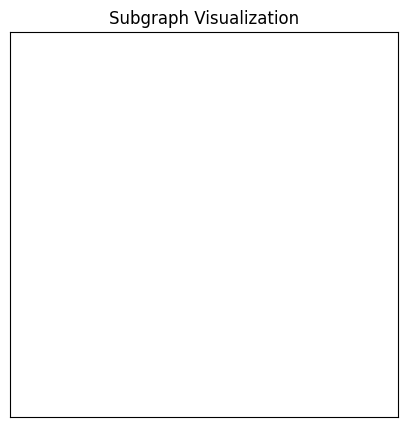

In [153]:
from torch_geometric.utils import subgraph, to_networkx
import networkx as nx

# Draw subgraph
plt.figure(figsize=(5, 5))
#nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=8)
plt.xticks([])
plt.yticks([])
plt.title("Subgraph Visualization")
plt.show()

In [154]:
#Cora dataset, to confirm code is working
#from torch_geometric.datasets import Planetoid
#dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
#graph = dataset[0]  # Get the first graph object.
#num_features = graph.x.shape[1]
#num_classes = len(np.unique(graph.y))
#num_nodes = graph.x.shape[0]

In [155]:
num_features

1

In [156]:
num_classes

7

In [157]:
num_nodes

4067

## Training a Multi-layer Perception Network (MLP)

In theory, we should be able to infer the category of a neuron solely based on its content, *i.e.* its actvity feature representation, without taking any relational information into account.

Let's verify that by constructing a simple MLP that solely operates on input node features (using shared weights across all nodes):

In [158]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=1, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Our MLP is defined by two linear layers and enhanced by [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU) non-linearity and [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html?highlight=dropout#torch.nn.Dropout).
Here, we first reduce the 1433-dimensional feature vector to a low-dimensional embedding (`hidden_channels=16`), while the second linear layer acts as a classifier that should map each low-dimensional node embedding to one of the 7 classes.

Let's train our simple MLP by following a similar procedure as described in [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8).
We again make use of the **cross entropy loss** and **Adam optimizer**.
This time, we also define a **`test` function** to evaluate how well our final model performs on the test node set (which labels have not been observed during training).

In [159]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.0191
Epoch: 002, Loss: 1.9650
Epoch: 003, Loss: 1.9022
Epoch: 004, Loss: 1.8083
Epoch: 005, Loss: 1.7742
Epoch: 006, Loss: 1.7384
Epoch: 007, Loss: 1.6597
Epoch: 008, Loss: 1.6009
Epoch: 009, Loss: 1.5639
Epoch: 010, Loss: 1.5093
Epoch: 011, Loss: 1.5079
Epoch: 012, Loss: 1.4736
Epoch: 013, Loss: 1.4324
Epoch: 014, Loss: 1.4362
Epoch: 015, Loss: 1.3922
Epoch: 016, Loss: 1.3421
Epoch: 017, Loss: 1.3530
Epoch: 018, Loss: 1.3354
Epoch: 019, Loss: 1.2951
Epoch: 020, Loss: 1.2781
Epoch: 021, Loss: 1.2851
Epoch: 022, Loss: 1.2750
Epoch: 023, Loss: 1.2633
Epoch: 024, Loss: 1.2205
Epoch: 025, Loss: 1.2183
Epoch: 026, Loss: 1.2180
Epoch: 027, Loss: 1.2182
Epoch: 028, Loss: 1.2325
Epoch: 029, Loss: 1.2032
Epoch: 030, Loss: 1.2111
Epoch: 031, Loss: 1.2205
Epoch: 032, Loss: 1.1851
Epoch: 033, Loss: 1.1897
Epoch: 034, Loss: 1.1794
Epoch: 035, Loss: 1.1470
Epoch: 036, Loss: 1.1567
Epoch: 037, Loss: 1.1660
Epoch: 038, Loss: 1.1428
Epoch: 039, Loss: 1.1511
Epoch: 040, Loss: 1.1546


In [160]:
out = model(graph.x)


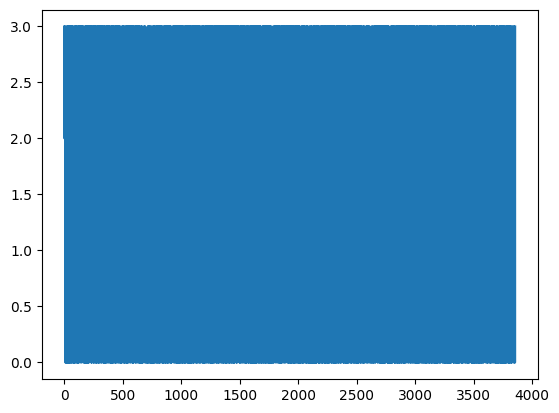

In [161]:
plt.plot(out.argmax(dim=1))

After training the model, we can call the `test` function to see how well our model performs on unseen labels.
Here, we are interested in the accuracy of the model, *i.e.*, the ratio of correctly classified nodes:

In [162]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.3333


## Training a Graph Neural Network (GNN)

We can easily convert our MLP to a GNN by swapping the `torch.nn.Linear` layers with PyG's GNN operators.

Following-up on [the first part of this tutorial](https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8), we replace the linear layers by the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) module.
To recap, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)) is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \sum_{w \in \mathcal{N}(v) \, \cup \, \{ v \}} \frac{1}{c_{w,v}} \cdot \mathbf{x}_w^{(\ell)}
$$

where $\mathbf{W}^{(\ell + 1)}$ denotes a trainable weight matrix of shape `[num_output_features, num_input_features]` and $c_{w,v}$ refers to a fixed normalization coefficient for each edge.
In contrast, a single `Linear` layer is defined as

$$
\mathbf{x}_v^{(\ell + 1)} = \mathbf{W}^{(\ell + 1)} \mathbf{x}_v^{(\ell)}
$$

which does not make use of neighboring node information.

In [163]:
#GAT GIN?
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1, 16)
  (conv2): GCNConv(16, 7)
)


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

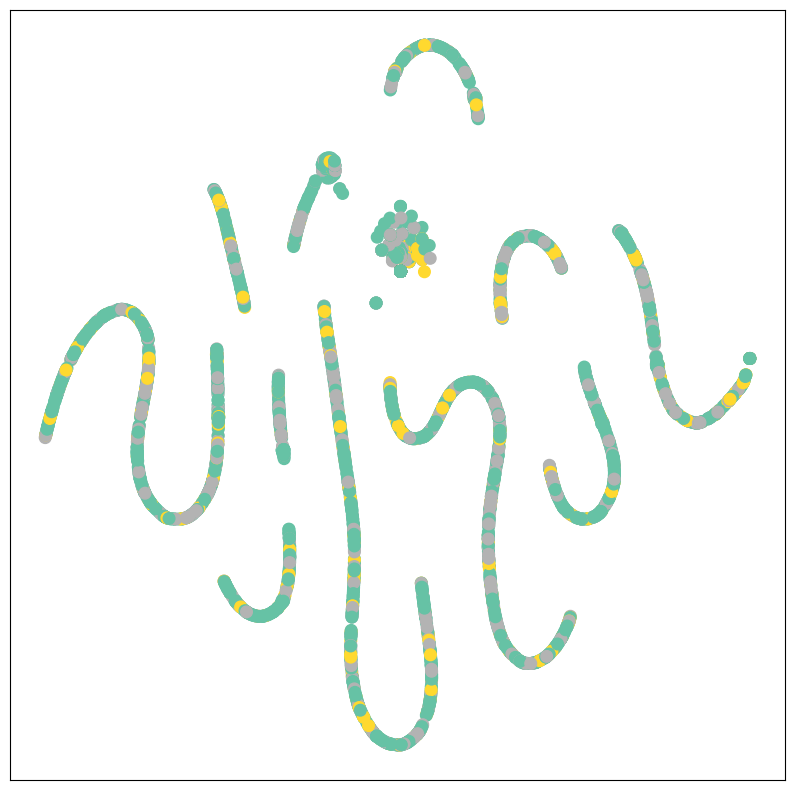

In [164]:
model = GCN(hidden_channels=16)
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

We certainly can do better by training our model.
The training and testing procedure is once again the same, but this time we make use of the node features `x` **and** the graph connectivity `edge_index` as input to our GCN model.

In [165]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 2.1786
Epoch: 002, Loss: 2.1118
Epoch: 003, Loss: 2.0625
Epoch: 004, Loss: 2.0213
Epoch: 005, Loss: 1.9485
Epoch: 006, Loss: 1.9050
Epoch: 007, Loss: 1.8554
Epoch: 008, Loss: 1.8214
Epoch: 009, Loss: 1.7914
Epoch: 010, Loss: 1.7542
Epoch: 011, Loss: 1.7189
Epoch: 012, Loss: 1.6934
Epoch: 013, Loss: 1.6749
Epoch: 014, Loss: 1.6330
Epoch: 015, Loss: 1.6119
Epoch: 016, Loss: 1.5907
Epoch: 017, Loss: 1.5415
Epoch: 018, Loss: 1.5194
Epoch: 019, Loss: 1.5208
Epoch: 020, Loss: 1.4848
Epoch: 021, Loss: 1.4635
Epoch: 022, Loss: 1.4570
Epoch: 023, Loss: 1.4313
Epoch: 024, Loss: 1.4222
Epoch: 025, Loss: 1.4086
Epoch: 026, Loss: 1.3836
Epoch: 027, Loss: 1.3859
Epoch: 028, Loss: 1.3582
Epoch: 029, Loss: 1.3442
Epoch: 030, Loss: 1.3125
Epoch: 031, Loss: 1.3124
Epoch: 032, Loss: 1.2994
Epoch: 033, Loss: 1.2878
Epoch: 034, Loss: 1.2675
Epoch: 035, Loss: 1.2641
Epoch: 036, Loss: 1.2509
Epoch: 037, Loss: 1.2413
Epoch: 038, Loss: 1.2391
Epoch: 039, Loss: 1.2128
Epoch: 040, Loss: 1.2105


In [166]:
out = model(graph.x, graph.edge_index)


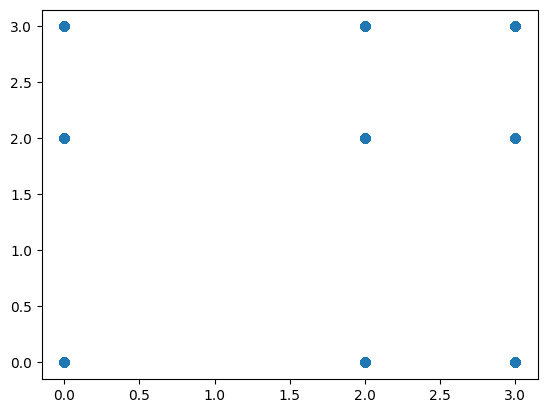

In [167]:
plt.scatter(out.argmax(dim=1), graph.y)

In [168]:
graph.y

tensor([0, 3, 3,  ..., 0, 0, 0])

After training the model, we can check its test accuracy:

In [169]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.3100


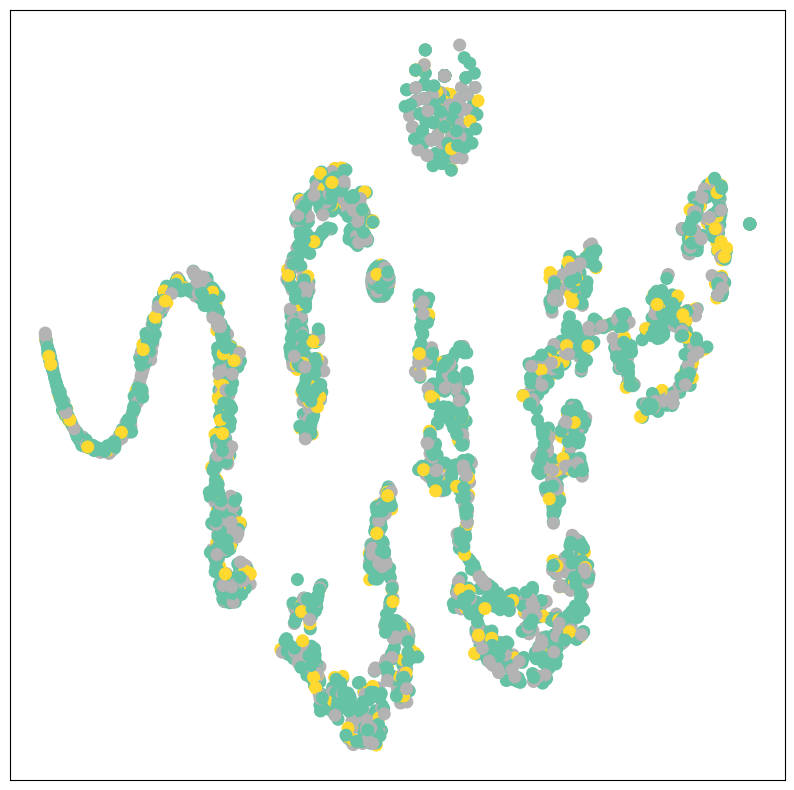

In [170]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [171]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# Assuming num_features and num_classes are defined globally
# e.g., num_features = dataset.num_features, num_classes = dataset.num_classes

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(num_features, hidden_channels, heads=8, dropout=0.6)
        # Output dim of conv1 is hidden_channels * heads, so we set in_channels accordingly
        self.conv2 = GATConv(hidden_channels * 8, num_classes, heads=1, concat=False, dropout=0.6)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=32)
print(model)

GAT(
  (conv1): GATConv(1, 32, heads=8)
  (conv2): GATConv(256, 7, heads=1)
)


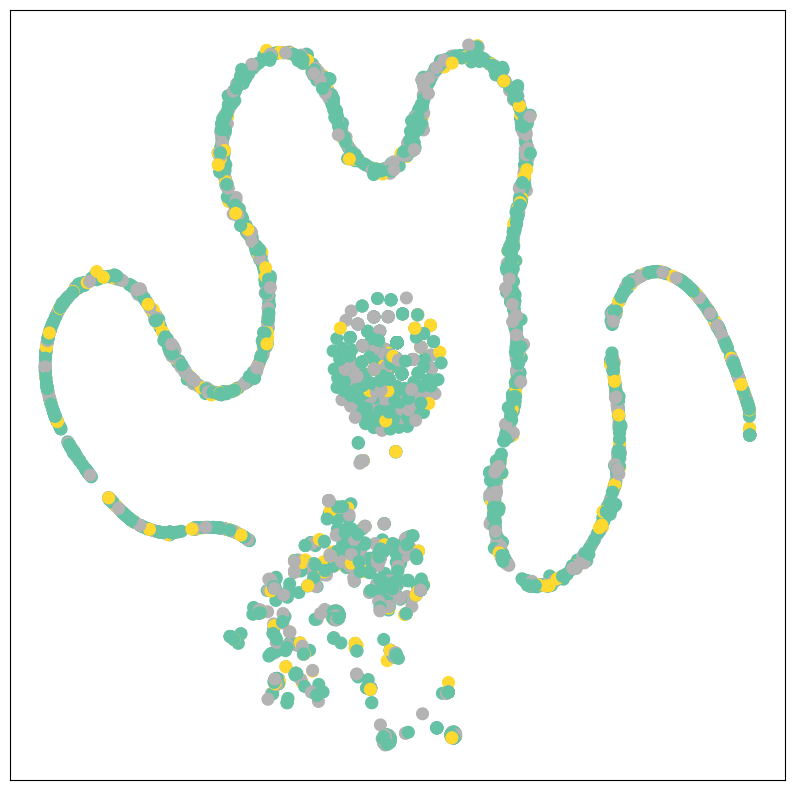

In [172]:
model = GAT(hidden_channels=32)
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)

In [173]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GAT(hidden_channels=32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(graph.x, graph.edge_index)  # Perform a single forward pass.
      loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(graph.x, graph.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[graph.test_mask] == graph.y[graph.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(graph.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 1001):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9049
Epoch: 002, Loss: 1.6411
Epoch: 003, Loss: 1.4863
Epoch: 004, Loss: 1.3887
Epoch: 005, Loss: 1.3268
Epoch: 006, Loss: 1.3048
Epoch: 007, Loss: 1.3132
Epoch: 008, Loss: 1.3079
Epoch: 009, Loss: 1.2665
Epoch: 010, Loss: 1.2758
Epoch: 011, Loss: 1.2646
Epoch: 012, Loss: 1.2894
Epoch: 013, Loss: 1.2776
Epoch: 014, Loss: 1.2872
Epoch: 015, Loss: 1.2562
Epoch: 016, Loss: 1.2621
Epoch: 017, Loss: 1.2478
Epoch: 018, Loss: 1.2616
Epoch: 019, Loss: 1.2434
Epoch: 020, Loss: 1.2527
Epoch: 021, Loss: 1.2262
Epoch: 022, Loss: 1.2274
Epoch: 023, Loss: 1.1919
Epoch: 024, Loss: 1.2335
Epoch: 025, Loss: 1.2197
Epoch: 026, Loss: 1.2368
Epoch: 027, Loss: 1.2321
Epoch: 028, Loss: 1.2008
Epoch: 029, Loss: 1.2182
Epoch: 030, Loss: 1.2341
Epoch: 031, Loss: 1.1768
Epoch: 032, Loss: 1.2445
Epoch: 033, Loss: 1.2025
Epoch: 034, Loss: 1.2091
Epoch: 035, Loss: 1.2006
Epoch: 036, Loss: 1.2016
Epoch: 037, Loss: 1.2088
Epoch: 038, Loss: 1.2294
Epoch: 039, Loss: 1.2028
Epoch: 040, Loss: 1.1898


In [174]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.3300


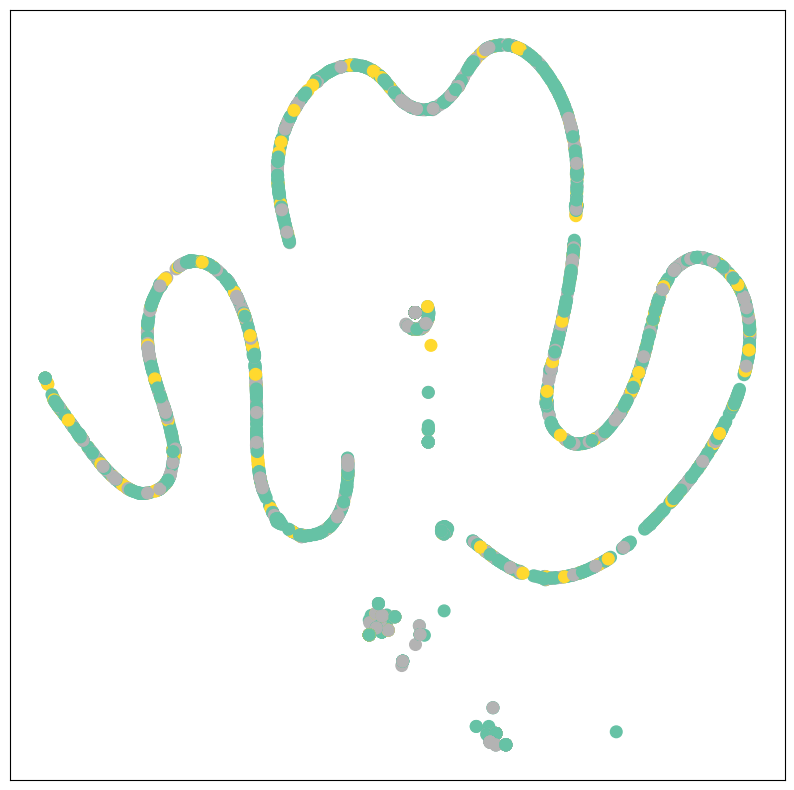

In [175]:
model.eval()

out = model(graph.x, graph.edge_index)
visualize(out, color=graph.y)